In [1]:
from skimage import data
from skimage.filters import gaussian 
from skimage.feature import  Cascade
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_Face(image,d):
    x_start, y_start = d['r'], d['c']
    x_end = x_start + d['height']
    y_end = y_start + d['width']
    
    # Extract the detected face
    face = image[x_start:x_end, y_start:y_end]
    return face


In [3]:
def mergeBlurryFace(original, gaussian_image,d):
    x_start, y_start = d['r'], d['c']
    x_end = x_start + d['height']
    y_end = y_start + d['width']
    
    # Replace the original face region with the blurred face
    original[x_start:x_end, y_start:y_end] = gaussian_image
    return original


In [4]:
def show_image(image, title='Image', cmap_type='gray'): 
    plt.imshow(image, cmap=cmap_type)   
    plt.title(title)  
    plt.axis('off')    
    plt.show()

In [5]:
def blur_Faces(image):
    trained_file = data.lbp_frontal_face_cascade_filename()# Initialize the detector cascade.
    detector = Cascade(trained_file)
    detected = detector.detect_multi_scale(img=image,scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), #minimum size of the face search area
                                       max_size=(200, 200)) #maximum size of the face search area
    
    resulting_image = image.copy()
    for d in detected:  # Obtain the face cropped from detected coordinates    
        face = get_Face(image,d)
        face_float = face.astype(float) / 255.0
        gaussian_face = gaussian(face_float, sigma=10, channel_axis=-1)
        
        # Convert back to original format after blurring
        gaussian_face = (gaussian_face * 255).astype(np.uint8)
        resulting_image = mergeBlurryFace(resulting_image, gaussian_face,d)
    show_image(image,title='Original image')
    show_image(resulting_image,title='Image with privacy filter applied')

In [6]:
image=data.astronaut() #load an image from scikit-image's data module

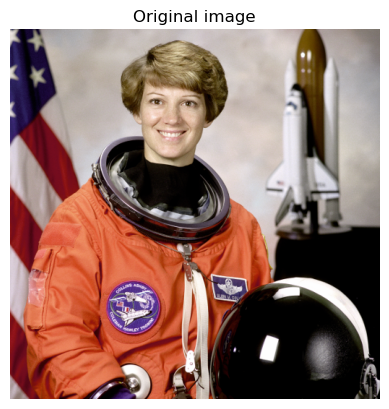

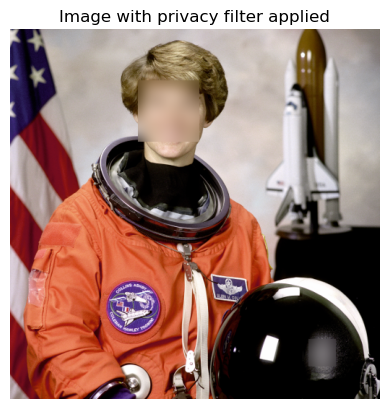

In [7]:
blur_Faces(image)